In [ ]:
""""PCA
1. affected by teh outliers in teh data
2. used for dimension reduction
3. compare teh eigenvalues and eigenvectors
4. used for standardize the data
5. sort the eigenvalues in dec order; chose k eigenvectors that correspond to k largest eigen values
6. Construct a projection matrix W from selected k eigen vectors
7. Unsupervised Learning"""

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('E://Gaurav/ML_Dataset/PCA/Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
#ind var - 0:len-1 ; dept var - last one

In [ ]:
""""
1. wine buiness owner gathered teh information - chemical info of several wines.
2. find segmenst of customer that like a particular wine
3. each segment having specific preferance for a specific wines
4. 3 types of wines -  so 3 segemts to customers
5. for business - info about customer segments and wine and create logistic model based on that (dept variable - customer segment)
6. 13 dimensions- not possible to create model based on this
7. Hence we reduce the dimensionality and visualize the result"""

In [4]:
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values 

In [6]:
# dividing the data into training and test data:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0) #20% in test set

In [7]:
# feature Scaling must be applied in dimension reduction

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)  

# feature scaling important since we need to predict precisely

In [8]:
# PCA to be applied right after data preprocessing
# n_components - the number of components that we need ot extract that will explain most the variance
from sklearn.decomposition import PCA
pca = PCA(n_components = None) # to see cumulative varianxce by ALL teh compoennts

In [9]:
# fiting into training set and transforming teh train set

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [10]:
explained_variance = pca.explained_variance_ratio_   # from most to least variance ; pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension

In [15]:
explained_variance # top 2 - expalin almost 56% of variance , so we take 2 PCAs (overall we can say we have 2 ind variables to work upon)

array([0.36884109, 0.19318394])

In [12]:
pca = PCA(n_components = 2) # doing again with no of compoenents = 2

In [13]:
# fiting into training set and transforming teh train set

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [14]:
explained_variance = pca.explained_variance_ratio_

In [17]:
# Fiting the regression

from sklearn.linear_model import LogisticRegression

In [18]:
classifier = LogisticRegression(random_state=0)

In [19]:
classifier.fit(x_train,y_train) # model fitted to train set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Predicting the Test Result

y_pred = classifier.predict(x_test)

In [21]:
y_pred # 1st customer - belongs to 1st segment, 2 nd customer to 3 rd segemnts etc)

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [22]:
# creating a confusion matrix

from sklearn.metrics import confusion_matrix  # this is a function and not a class !!!(CLasses are written in CAPS)

cm = confusion_matrix(y_test,y_pred)

In [23]:
cm # 3 classes 3x3 size ; diagonal contains correct prediction

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


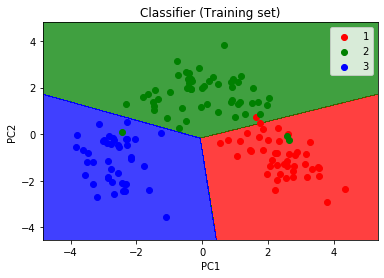

In [26]:
# Visualizing the Training set result

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


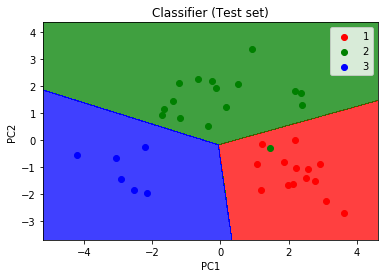

In [28]:
# Visualizing the Test set result

from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))  #3 colors since 3 classes
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
# Almost perfect result  -100%